In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import glob
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
emotions_classes = {
    0: 'neutral',
    1: 'calm',
    2: 'happy',
    3: 'sad',
    4: 'angry',
    5: 'fearful',
    6: 'disgust',
    7: 'surprised'
}

class_labels = ['neutral', 'calm', 'happy',  'sad', 'angry', 'fearful', 'disgust', 'surprised']

In [ ]:
# Define the filepath to save the best model
model_checkpoints = "/content/drive/MyDrive/FYP/Code/Emotion-1903/data/ModelCheckPoints/"

In [ ]:
AUDIO_TRAIN_DIR = os.path.join('/content/drive/MyDrive/FYP/Code/Emotion-1903/data', 'Audio', 'train')

In [ ]:
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [ ]:
AUDIO_SPECTROGRAMS_DIR = '/content/drive/MyDrive/FYP/Code/Emotion-1903/data/Audio/Spectrograms'

In [ ]:


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

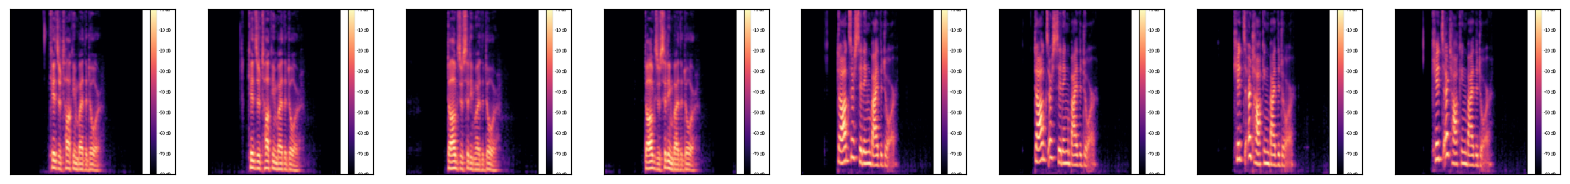

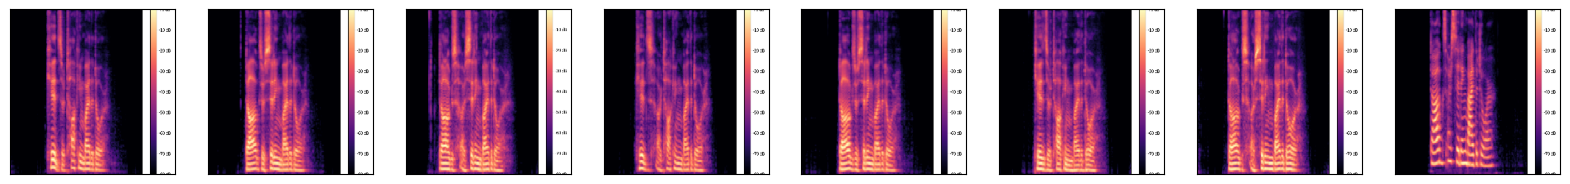

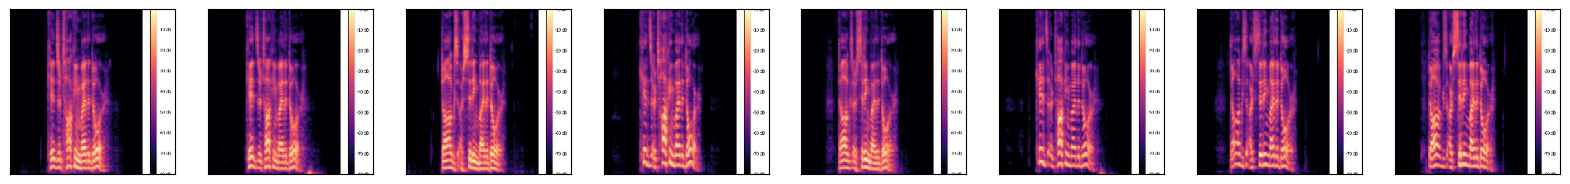

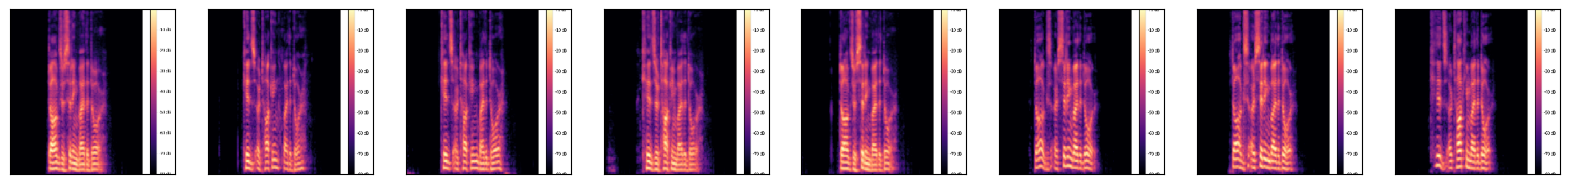

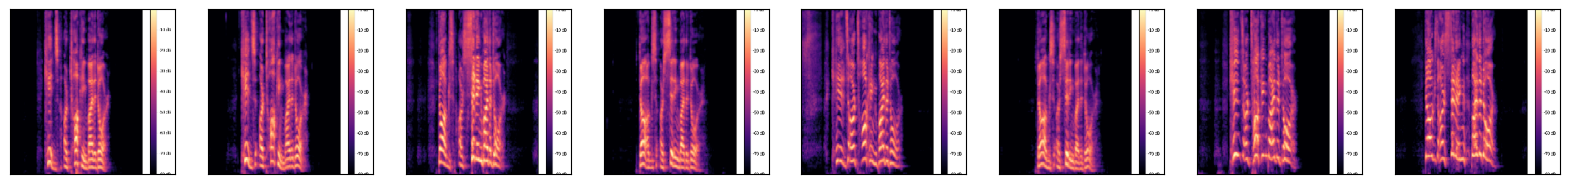

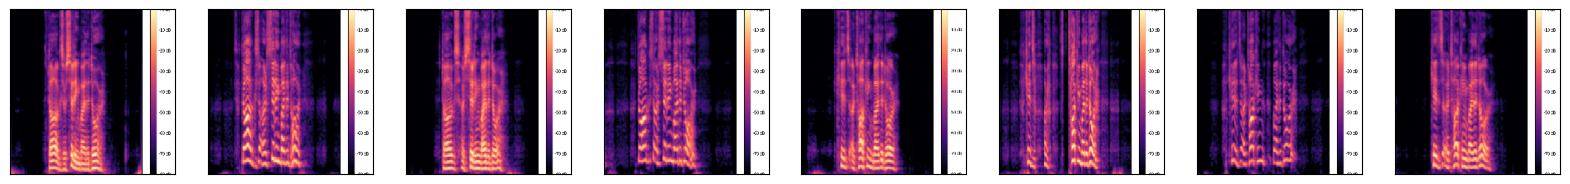

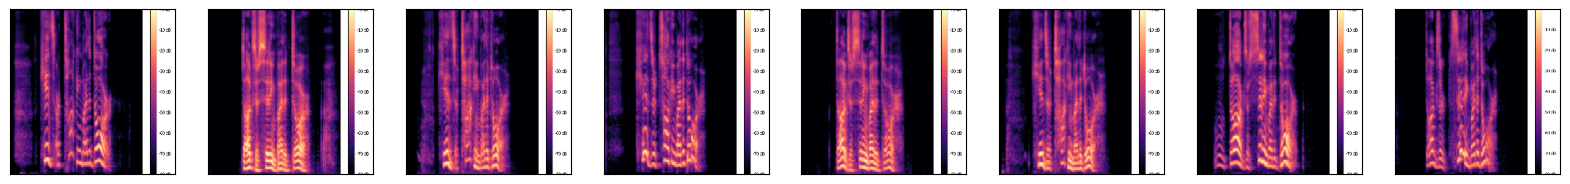

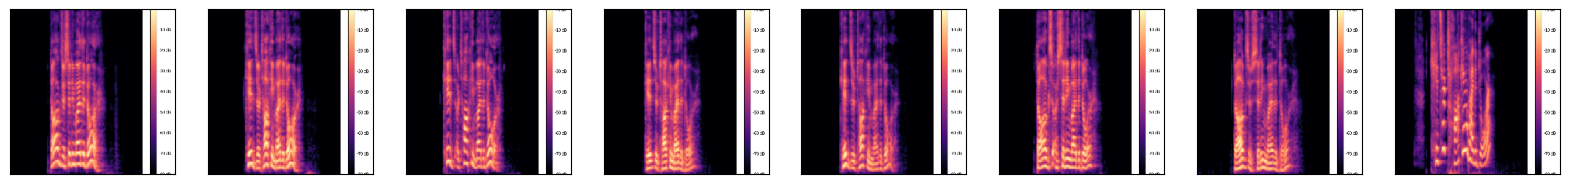

In [ ]:

  x += images
  y += labels

In [ ]:
len(y)

1433

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=0)

x_train_norm = np.array(x_train) / 255
x_val_norm = np.array(x_val) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=(7, 7, 1280)))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1024, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
if not os.path.exists(model_checkpoints):
  os.mkdir(model_checkpoints)

# Define the ModelCheckpoint callback to monitor validation loss and save the best model
# callback = EarlyStopping(monitor='val_accuracy', patience=15, mode="max")
checkpoint = ModelCheckpoint(model_checkpoints, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with checkpoint callback
hist = model.fit(x_train_norm, y_train_encoded,
                 validation_data=(x_val_norm, y_val_encoded),
                 batch_size=20,
                 epochs=700,
                 callbacks=[checkpoint])

Epoch 1/700
41/41 [==============================] - ETA: 0s - loss: 6.4012 - accuracy: 0.1733
Epoch 1: val_accuracy improved from -inf to 0.13433, saving model to /content/drive/MyDrive/FYP/Code/Emotion-1903/data/ModelCheckPoints/


41/41 [==============================] - 69s 902ms/step - loss: 6.4012 - accuracy: 0.1733 - val_loss: 15.3850 - val_accuracy: 0.1343
Epoch 2/700
41/41 [==============================] - ETA: 0s - loss: 2.8335 - accuracy: 0.2319
Epoch 2: val_accuracy did not improve from 0.13433
41/41 [==============================] - 5s 115ms/step - loss: 2.8335 - accuracy: 0.2319 - val_loss: 8.2401 - val_accuracy: 0.1343
Epoch 3/700
40/41 [============================>.] - ETA: 0s - loss: 2.0773 - accuracy: 0.2950
Epoch 3: val_accuracy improved from 0.13433 to 0.14428, saving model to /content/drive/MyDrive/FYP/Code/Emotion-1903/data/ModelCheckPoints/


41/41 [==============================] - 33s 822ms/step - loss: 2.0729 - accuracy: 0.2968 - val_loss: 6.8023 - val_accuracy: 0.1443
Epoch 4/700
40/41 [============================>.] - ETA: 0s - loss: 1.8993 - accuracy: 0.3663
Epoch 4: val_accuracy did not improve from 0.14428
41/41 [==============================] - 4s 105ms/step - loss: 1.9010 - accuracy: 0.3653 - val_loss: 5.5551 - val_accuracy: 0.1095
Epoch 5/700
41/41 [==============================] - ETA: 0s - loss: 1.9930 - accuracy: 0.4052
Epoch 5: val_accuracy did not improve from 0.14428
41/41 [==============================] - 5s 117ms/step - loss: 1.9930 - accuracy: 0.4052 - val_loss: 9.6942 - val_accuracy: 0.1294
Epoch 6/700
40/41 [============================>.] - ETA: 0s - loss: 2.2909 - accuracy: 0.2875
Epoch 6: val_accuracy did not improve from 0.14428
41/41 [==============================] - 5s 111ms/step - loss: 2.2918 - accuracy: 0.2868 - val_loss: 27.1306 - val_accuracy: 0.1294
Epoch 7/700
40/41 [=================

[]

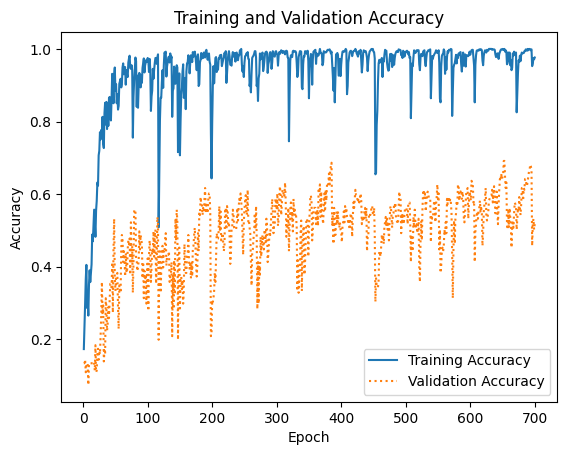

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
final_train_accuracy = hist.history['accuracy'][-1]
final_val_accuracy = hist.history['val_accuracy'][-1]

print("Final Training Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)


Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6651162505149841


In [ ]:
# Load the best model from the saved checkpoint
best_model = load_model(model_checkpoints)

14/14 [==============================] - 1s 44ms/step


Text(109.44999999999997, 0.5, 'Actual label')

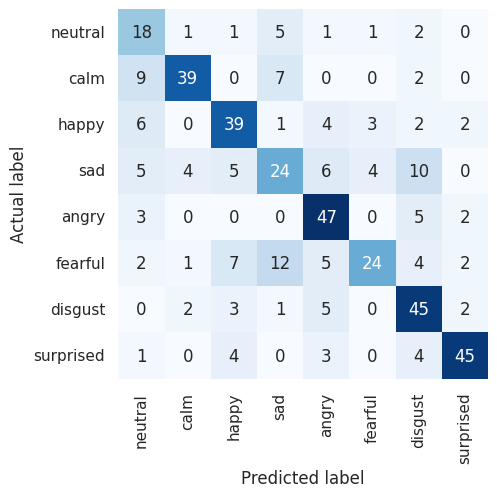

In [ ]:
sns.set()

y_predicted = best_model.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))


sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:


accuracy = accuracy_score(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
print("Accuracy:", accuracy)

Accuracy: 0.6534883720930232


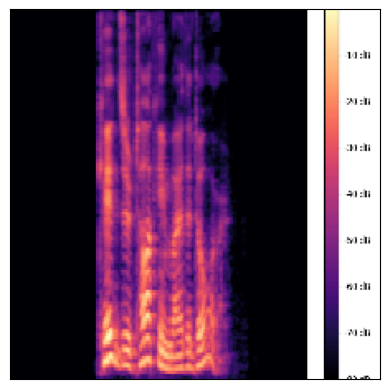

In [ ]:
# create_spectrogram('/content/drive/MyDrive/FYP/Code/Emotion-1903/data/Audio/train/angry/03-01-05-01-01-01-01.wav', '/content/drive/MyDrive/FYP/Code/Emotion-1903/data/Audio/Spectrograms/angry/03-01-05-01-01-01-01.png')

x = image.load_img('/content/drive/MyDrive/FYP/Code/Emotion-1903/data/Audio/Spectrograms/surprised/03-01-08-01-01-01-01.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [ ]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# y = base_model.predict(x)
predictions = best_model.predict(x)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 [==============================] - 0s 189ms/step
neutral: 0.9999798536300659
calm: 9.273426258005202e-07
happy: 1.5894956959527917e-06
sad: 1.5304241969715804e-05
angry: 1.8784877511279774e-06
fearful: 4.654256702263382e-10
disgust: 2.853806790881208e-07
surprised: 4.7986798534793706e-08


In [ ]:
!pip install lime

In [ ]:
import skimage

In [ ]:
def transform_img_fn_ori(url):

    x = image.load_img(url, target_size=(224, 224))
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # y = base_model.predict(x)
    predictions = best_model.predict(x)
    return x

In [ ]:
images_inc_im = transform_img_fn_ori('/content/drive/MyDrive/FYP/Code/Emotion-1903/data/Audio/Spectrograms/calm/03-01-02-01-01-01-01.png')

1/1 [==============================] - 0s 125ms/step


In [ ]:
import lime
from tensorflow.keras.applications import inception_v3 as inc_net
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

In [ ]:
images_inc_im[0].shape

(224, 224, 3)

In [ ]:
explanation = explainer.explain_instance(images_inc_im[0], best_model.predict,  top_labels=1, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 469ms/step


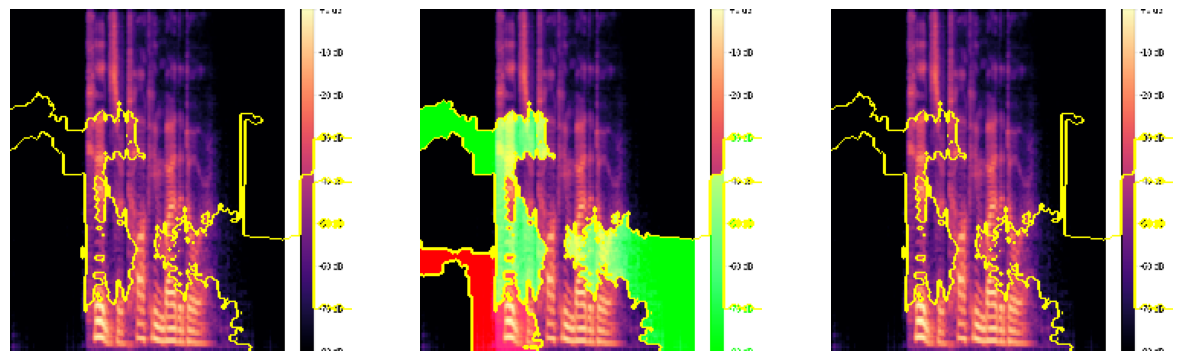

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
temp_3, mask_3 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1 / 2 + 0.5, mask_1))
ax2.imshow(mark_boundaries(temp_2 / 2 + 0.5, mask_2))
ax3.imshow(mark_boundaries(temp_3 / 2 + 0.5, mask_3))
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.savefig('mask_default_xxx.png')